In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
%matplotlib inline

In [434]:
#df = pd.read_csv('https://aineistot.liikennevirasto.fi/lam/rawdata/2018/[ELY]/lamraw_[lam_id]_[yearshort]_[day_number].csv')
df = pd.read_csv('168_kt50_Askisto_20180501_20180531.csv', delimiter=';')

In [435]:
df.head(20)

,Mittauspiste,Sijainti,Päivä,Suuntakoodi,Ajoneuvoluokka,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_14-15,KLO_15-16,KLO_16-17,KLO_17-18,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00
0,168,kt50_Askisto,01.05.2018,1,11 HA-PA,183,115,84,88,102,...,1003,1022,1081,989,877,784,580,380,237,101
1,168,kt50_Askisto,01.05.2018,1,12 KAIP,3,4,,3,1,...,7,10,6,9,9,8,7,3,1,4
2,168,kt50_Askisto,01.05.2018,1,13 Linja-autot,1,3,3,4,5,...,3,2,2,1,1,1,1,,1,2
3,168,kt50_Askisto,01.05.2018,1,14 KAPP,5,3,1,,1,...,10,7,8,5,10,10,5,20,8,1
4,168,kt50_Askisto,01.05.2018,1,15 KATP,6,6,6,1,4,...,8,5,6,8,5,5,14,14,13,8
5,168,kt50_Askisto,01.05.2018,1,16 HA + PK,1,2,1,1,,...,17,10,21,18,13,17,12,7,2,3
6,168,kt50_Askisto,01.05.2018,1,17 HA + AV,,,,,,...,1,4,5,3,,,1,,2,
7,168,kt50_Askisto,01.05.2018,2,11 HA-PA,258,158,85,55,58,...,968,1115,1205,1004,937,766,606,339,250,215
8,168,kt50_Askisto,01.05.2018,2,12 KAIP,4,2,4,,2,...,5,7,5,10,6,2,10,6,3,5
9,168,kt50_Askisto,01.05.2018,2,13 Linja-autot,3,4,1,3,,...,2,3,1,2,4,2,2,,1,2


In [453]:
def get_weekday(date_str):
    date = parser.parse(date_str, dayfirst=True)
    weekday = date.weekday()
    return weekday

def get_week(date_str):
    date = parser.parse(date_str, dayfirst=True)
    week = date.isocalendar()[1]
    return week

def get_hour_cols():
    hour_cols = [" KLO_{:02}-{:02}".format(i, i+1) for i in range(24)]
    hour_cols[-1] = " KLO_23-00"
    return hour_cols

def get_sum(row):
    #return row[get_hour_cols()].sum()
    s = 0
    for col in get_hour_cols():
        value = row[col]
        if isinstance(value, int):
            s += value
        elif isinstance(value, str) and value.isdigit():
            s += int(value)
    return s

In [451]:
# add calculated fields
df["Viikonpäivä"] = df.Päivä.apply(get_weekday)
df["Viikko"] = df.Päivä.apply(get_week)
df["SUM"] = df.apply(lambda row: get_sum(row), axis=1)

In [454]:
#df = df[(df.Ajoneuvoluokka == "11 HA-PA")]

In [455]:
df.head(20)
df.columns

Index(['Mittauspiste', 'Sijainti', 'Päivä', 'Suuntakoodi', 'Ajoneuvoluokka',
       ' KLO_00-01', ' KLO_01-02', ' KLO_02-03', ' KLO_03-04', ' KLO_04-05',
       ' KLO_05-06', ' KLO_06-07', ' KLO_07-08', ' KLO_08-09', ' KLO_09-10',
       ' KLO_10-11', ' KLO_11-12', ' KLO_12-13', ' KLO_13-14', ' KLO_14-15',
       ' KLO_15-16', ' KLO_16-17', ' KLO_17-18', ' KLO_18-19', ' KLO_19-20',
       ' KLO_20-21', ' KLO_21-22', ' KLO_22-23', ' KLO_23-00', 'Viikonpäivä',
       'Viikko', 'SUM'],
      dtype='object')

In [456]:
ha = df[(df.Ajoneuvoluokka == "11 HA-PA") & (df.Suuntakoodi == 1)]

In [448]:
ha

,Mittauspiste,Sijainti,Päivä,Suuntakoodi,Ajoneuvoluokka,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_17-18,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00,Viikonpäivä,Viikko,SUM
0,168,kt50_Askisto,01.05.2018,1,11 HA-PA,183,115,84,88,102,...,989,877,784,580,380,237,101,1,18,11730
14,168,kt50_Askisto,02.05.2018,1,11 HA-PA,53,22,25,64,152,...,1603,1107,778,660,475,224,132,2,18,25864
28,168,kt50_Askisto,03.05.2018,1,11 HA-PA,52,49,33,51,145,...,1611,1187,805,728,485,291,129,3,18,25618
42,168,kt50_Askisto,04.05.2018,1,11 HA-PA,74,55,31,56,129,...,1624,1253,923,727,515,391,252,4,18,26814
56,168,kt50_Askisto,05.05.2018,1,11 HA-PA,131,72,69,88,131,...,1115,1017,794,613,535,380,249,5,18,17296
70,168,kt50_Askisto,06.05.2018,1,11 HA-PA,216,160,634,108,109,...,1439,1365,1063,739,494,293,133,6,18,17081
84,168,kt50_Askisto,07.05.2018,1,11 HA-PA,77,41,23,55,158,...,1556,1067,892,818,551,303,124,0,19,25780
98,168,kt50_Askisto,08.05.2018,1,11 HA-PA,49,38,30,60,127,...,1594,1118,907,719,531,305,149,1,19,25495
112,168,kt50_Askisto,09.05.2018,1,11 HA-PA,66,34,38,68,158,...,1848,1430,973,803,522,353,234,2,19,27464
126,168,kt50_Askisto,10.05.2018,1,11 HA-PA,162,79,54,55,108,...,1199,1066,857,733,534,283,161,3,19,16731


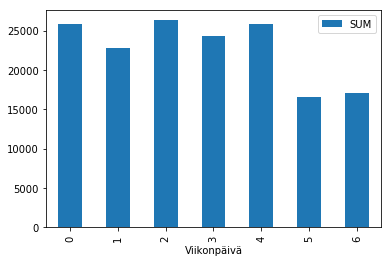

In [449]:
# average volume per weekday
avg_weekday = ha[["Viikonpäivä", "SUM"]].groupby(["Viikonpäivä"]).agg('mean').reset_index()
#avg_weekday
avg_weekday.plot(x="Viikonpäivä", y="SUM", kind="bar")

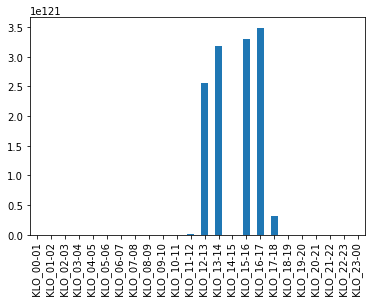

In [450]:
# average volume per clock time
avg_time = ha[get_hour_cols()].mean(axis=0)
avg_time
avg_time.plot(kind="bar")